[![Fixel Algorithms](https://i.imgur.com/AqKHVZ0.png)](https://fixelalgorithms.gitlab.io/)

# Linear Classifier Random

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 1.0.000 | 02/03/2024 | Royi Avital | First version                                                      |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/AIProgram/2024_02/0026LinearClassifier.ipynb)

In [2]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp
import pandas as pd

from numba import jit, njit

# Image Processing

# Machine Learning


# Miscellaneous
import os
from platform import python_version
import random
import timeit

# Typing
from typing import Callable, List, Tuple

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# from bokeh.plotting import figure, show

# Jupyter
from IPython import get_ipython
from IPython.display import Image, display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

Code Notations:

```python
someVar    = 2; #<! Notation for a variable
vVector    = np.random.rand(4) #<! Notation for 1D array
mMatrix    = np.random.rand(4, 3) #<! Notation for 2D array
tTensor    = np.random.rand(4, 3, 2, 3) #<! Notation for nD array (Tensor)
tuTuple    = (1, 2, 3) #<! Notation for a tuple
lList      = [1, 2, 3] #<! Notation for a list
dDict      = {1: 3, 2: 2, 3: 1} #<! Notation for a dictionary
oObj       = MyClass() #<! Notation for an object
dfData     = pd.DataFrame() #<! Notation for a data frame
dsData     = pd.Series() #<! Notation for a series
hObj       = plt.Axes() #<! Notation for an object / handler / function handler
```

### Code Exercise

 - Single line fill

 ```python
 vallToFill = ???
 ```

 - Multi Line to Fill (At least one)

 ```python
 # You need to start writing
 ????
 ```

 - Section to Fill

```python
#===========================Fill This===========================#
# 1. Explanation about what to do.
# !! Remarks to follow / take under consideration.
mX = ???

???
#===============================================================#
```

In [3]:
# Configuration
# %matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# Matplotlib default color palette
lMatPltLibclr = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())

In [4]:
# Constants

FIG_SIZE_DEF    = (8, 8)
ELM_SIZE_DEF    = 50
CLASS_COLOR     = ('b', 'r')
EDGE_COLOR      = 'k'
MARKER_SIZE_DEF = 10
LINE_WIDTH_DEF  = 2

In [5]:
# Courses Packages
import sys
sys.path.append('../')
sys.path.append('../../')
sys.path.append('../../../')
from utils.DataVisualization import Plot2DLinearClassifier, PlotBinaryClassData


In [6]:
# General Auxiliary Functions



In [7]:
# Parameters

# Data Generation
numSamples = 1000
numSwaps = int(0.05 * numSamples)

# Ground Truth Classifier
paramA = -1
paramB = 0.3

# Data Visualization
numGridPts = 250

## Generate / Load Data

In [8]:
# Generate Data 
vL = np.array([paramA, paramB]) #<! The line is y = ax + b (Pay attention, this is not the `b` of the classifier)
mX = 4 * np.random.rand(numSamples, 2) - 2 #<! The box [-2, 2] x [-2, 2]
vY = paramA * mX[:, 0] + paramB < mX[:, 1] #<! Class 0: Below the curve, Class 1: Above the curve
vY[:numSwaps] = ~vY[:numSwaps]
vY = vY.astype(np.int_)

print(f'The features data shape: {mX.shape}')
print(f'The labels data shape: {vY.shape}')

The features data shape: (1000, 2)
The labels data shape: (1000,)


In [9]:
# print sample of the data
print(mX[:5])
print(vY[:5])




[[-1.57081656 -1.15225228]
 [-0.44859316 -0.53943002]
 [-1.66088559 -0.68954901]
 [-0.12021296  0.2375023 ]
 [-0.95441541  1.12878475]]
[1 1 1 1 1]


### Plot the Data

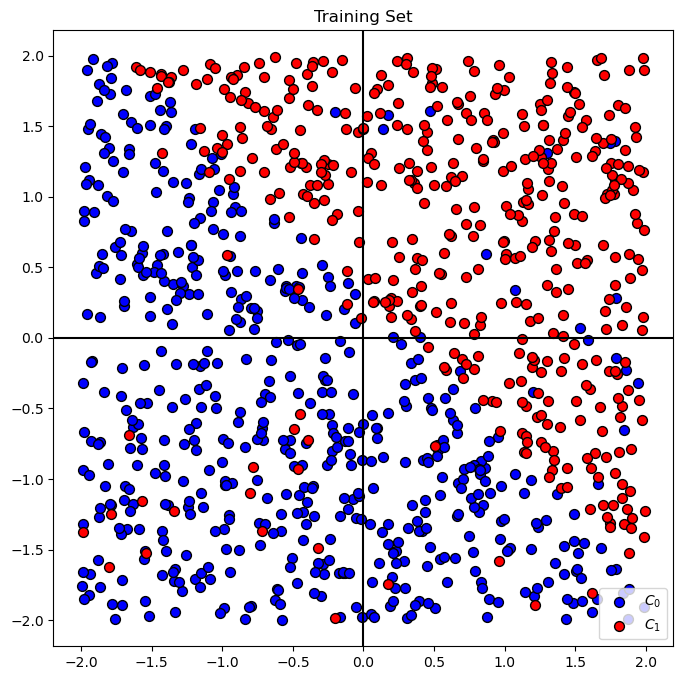

In [10]:
# Plot the Data

hA = PlotBinaryClassData(mX, vY, axisTitle = 'Training Set')

## Linear Classifier

$$ {f}_{\left( \boldsymbol{w} \right)} \left( \boldsymbol{x} \right) = \mathrm{sign} \left( \boldsymbol{w}^{T} \boldsymbol{x} - b \right) $$

Where $w$ are the parameters of the a linear plane.

### Moving from Affine Formulation to Classifier Formulation

Usually we know affine functions as $y = a x + c$, yet our classifier is given by $\boldsymbol{w}^{T} \boldsymbol{x} - b$.  
For 2D case, let's make the connection, given that $\boldsymbol{x} = \begin{bmatrix} x \\ y \end{bmatrix}$:

$$
\begin{align}
0 & = \boldsymbol{w}^{T} \boldsymbol{x} - b && \text{Definition} \\  
& = {w}_{1} x + {w}_{2} y - b && \text{} \\
\\ \Rightarrow y & = - \frac{{w}_{1}}{{w}_{2}} x + \frac{b}{{w}_{2}} && \text{The affine form} \\
y & = a x + c && \text{Where $a = - \frac{{w}_{1}}{{w}_{2}}$ and $c = \frac{b}{{w}_{2}}$}
\end{align}
$$



### Connection between $\boldsymbol{w}$ and $\theta$

The angle of the linear classifier (In 2D) is given by $\theta$ where ${w}_{1} = \cos \left( \theta \right), \; {w}_{2} = \sin \left( \theta \right)$.

In [11]:
# Grid of the data support
vV       = np.linspace(-2, 2, numGridPts)
XX0, XX1 = np.meshgrid(vV, vV)
XX       = np.stack([XX0.flatten(), XX1.flatten()])

In [12]:
# Plot a Linear Classifier

def PlotLinearClassifier(θ, b):
    vW = np.array([np.cos(np.deg2rad(θ)), np.sin(np.deg2rad(θ))])

    # vZ = (vW @ XX - vW[1] * b) > 0 #<! Moving from y = ax + b -> w1 x1 + w2 x2 - b = 0
    vZ = (vW @ XX - b) > 0
    ZZ = vZ.reshape(XX0.shape)
    
    # vHatY    = np.sign(vW @ mX.T - vW[1] * b) > 0 #<! Moving from y = ax + b -> w1 x1 + w2 x2 - b = 0
    vHatY    = np.sign(vW @ mX.T - b) > 0
    accuracy = np.mean(vY == vHatY)

    axisTitle = r'$f_{{w},b} \left( {x} \right) = {sign} \left( {w}^{T} {x} - b \right)$' '\n' f'Accuracy = {accuracy:.2%}'

    hF, hA = plt.subplots(figsize = (8, 8))
    PlotBinaryClassData(mX, vY, hA = hA, axisTitle = axisTitle)
    v = np.array([-2, 2])
    hA.grid(True)
    # hA.plot(v, -(vW[0] / vW[1]) * v + b, color = 'k', lw = 3) #<! y = ax + b notation
    hA.plot(v, -(vW[0] / vW[1]) * v + (b / vW[1]), color = 'k', lw = 3) #<! y = ax + b notation
    hA.arrow(0, 0, vW[0], vW[1], color = 'orange', width = 0.05)
    hA.axvline(x = 0, color = 'k', lw = 1)
    hA.axhline(y = 0, color = 'k', lw = 1)
    hA.contourf(XX0, XX1, ZZ, colors = CLASS_COLOR, alpha = 0.2, levels = [-0.5, 0.5, 1.5], zorder = 0)
    
    hA.axis([-2, 2, -2, 2])
    hA.set_xlabel('$x_1$')
    hA.set_ylabel('$x_2$')
    
    plt.show()

In [13]:
# Display the Geometry of the Classifier

θSlider = FloatSlider(min = 0, max = 360, step = 1, value = 30, layout = Layout(width = '30%'))
bSlider = FloatSlider(min = -2.5, max = 2.5, step = 0.1, value = -0.3, layout = Layout(width = '30%'))
interact(PlotLinearClassifier, θ = θSlider, b = bSlider)

plt.show()

interactive(children=(FloatSlider(value=30.0, description='θ', layout=Layout(width='30%'), max=360.0, step=1.0…